我们尝试编写一个简单的锐化函数对图像进行锐化

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [2]:
df=pd.read_csv("train.csv")
Y = df.iloc[:, 0].values  # 标签数据
X = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X)
np.save("Y.npy", Y)
X_train = np.load("X.npy")
Y_train = np.load("Y.npy")

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state=42
)

print("数据形状:", X_train.shape)
print("数据形状:", Y_train.shape)
print("数据形状:", X_test.shape)
print("数据形状:", Y_test.shape)

数据形状: (35700, 784)
数据形状: (35700,)
数据形状: (6300, 784)
数据形状: (6300,)


数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

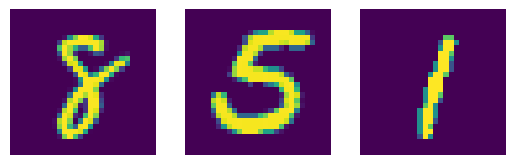

In [3]:

img_size = 28
dataX = np.load("X.npy")  # 查看数据形状
print("数据形状:", dataX.shape)  # 打印前五行数据
print(dataX[:10])
dataY = np.load("Y.npy")  # 查看数据形状
print("数据形状:", dataY.shape)  # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[300].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(dataX[900].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(dataX[1500].reshape(img_size, img_size))
plt.axis("off")

In [4]:
count=[0]*256
for i in range(20000):
    for j in range(256):
        count[dataX[i][j]]+=1
df_count=pd.DataFrame({"Number": np.arange(256),"Count":count})
print(df_count)


     Number    Count
0         0  4485936
1         1     2005
2         2     2694
3         3     2708
4         4     2802
..      ...      ...
251     251     7862
252     252    45126
253     253   100293
254     254    52947
255     255    24419

[256 rows x 2 columns]


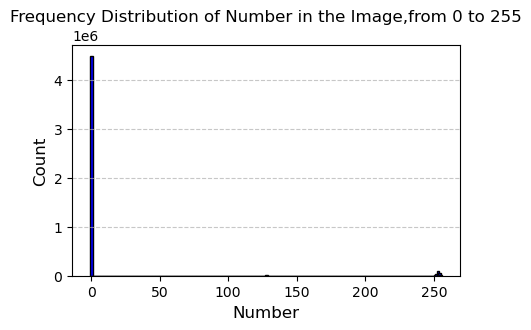

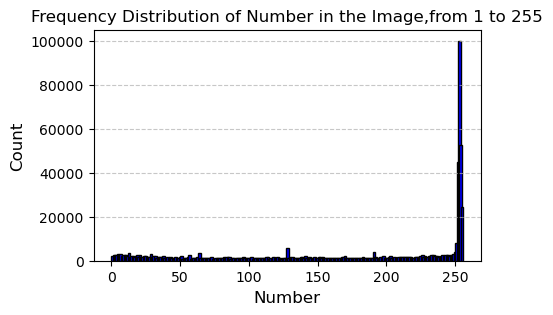

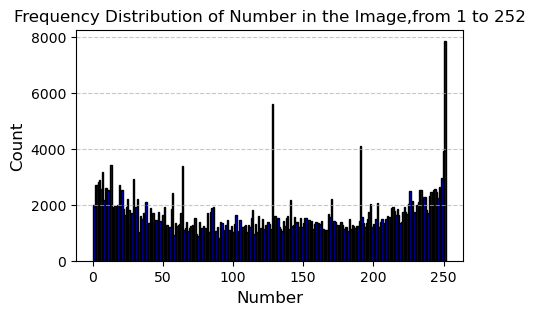

In [5]:
plt.figure(figsize=(5,3))
plt.bar(df_count["Number"],df_count["Count"],width=2,color="blue",edgecolor="black") 
plt.title("Frequency Distribution of Number in the Image,from 0 to 255")
plt.xlabel("Number", fontsize=12)  # x轴标签
plt.ylabel("Count", fontsize=12)  # y轴标签
plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # 添加网格
plt.show()

plt.figure(figsize=(5, 3))
plt.bar(df_count[1:]["Number"], df_count[1:]["Count"], width=2, color="blue", edgecolor="black")  # 由于0附近的数据过多影响观感，所以这里绘图去除0的数据
plt.title("Frequency Distribution of Number in the Image,from 1 to 255")
plt.xlabel("Number", fontsize=12)  # x轴标签
plt.ylabel("Count", fontsize=12)  # y轴标签
plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # 添加网格
plt.show()

# 仔细观察中间数据
plt.figure(figsize=(5, 3))
plt.bar(df_count[1:252]["Number"],df_count[1:252]["Count"],width=1,color="blue",edgecolor="black",
)  # 由于0附近的数据过多影响观感，所以这里绘图去除0的数据
plt.title("Frequency Distribution of Number in the Image,from 1 to 252")
plt.xlabel("Number", fontsize=12)  # x轴标签
plt.ylabel("Count", fontsize=12)  # y轴标签
plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # 添加网格
plt.show()

可以看出色彩值集中最多的几处为0，252至255，之外出现次数最多的一个色彩值为128，即数字图像的边界
下面基于此观察尝试锐化图像。
希望构造一个锐化函数，将127及其以下的值映射至0附近，将128及其以上的值映射至255附近
这样或许能保证在不丢失过多特征的情况下同时实现锐化。

In [6]:
import math
def sharpen_1(x):
    if x<=127:
        return x//16
    else:
        return (255*15+x)//16


In [7]:
dataX_sharpen=[[] for _ in range(42000)]
for i in range(42000):
    dataX_sharpen[i]=np.array(list(map(sharpen_1,dataX[i])))
dataX_sharpen=np.array(dataX_sharpen)
print(dataX_sharpen[0])
dataX_sharpen.shape

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 250 255   5   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 251 254 254
   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   7 254 254 249   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 254 254
 252   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1 252 254 253   4   0   

(42000, 784)

(-0.5, 27.5, 27.5, -0.5)

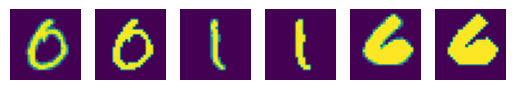

In [8]:
plt.subplot(1, 6, 1)
plt.imshow(dataX[200].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 6, 2)
plt.imshow(dataX_sharpen[200].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 6, 3)
plt.imshow(dataX[400].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 6, 4)
plt.imshow(dataX_sharpen[400].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 6, 5)
plt.imshow(dataX[500].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 6, 6)
plt.imshow(dataX_sharpen[500].reshape(img_size, img_size))
plt.axis("off")

In [9]:
data_sharpen = np.array(
    [
        np.concatenate(([dataY[i]], dataX_sharpen[i]))
        for i in range(42000)
    ]
)
print(data_sharpen.shape)
title=["lable"] + [f"pixel{i}" for i in range(1,785)]
# 写入 CSV 文件
with open("sharpen_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(title)

    # 将所有一维数据行写入 CSV 文件
    for row in data_sharpen:
        writer.writerow(row)

(42000, 785)
